### Download watershed boundaries for a specific HUC
Here we use the `urllib` and `zipfile` packages to download and unzip HUCs for a state specified in the first code box. Once downloaded, we see how the `geopandas` package is used to analyze and visualize the data. 

In [9]:
#Set the state
state = 'Maryland'

In [10]:
#Import modules
import os
import urllib
import zipfile #https://pymotw.com/2/zipfile/
import geopandas as gpd #http://geopandas.org/io.html

In [11]:
#Allow maps to be shown inline...
%matplotlib inline

The data we want is stored on an FTP server:ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/NHD/State/HighResolution/Shape). Open the link (*you'll have to copy and paste the link...*) and view the files. The zip files contain the shapefiles we want, and the all have a set name of `NHD_H_***_State_Shape.zip`, where `***` is the state name. 

So, what we want to do is create two variables. The first points to the FTP folder containing the file we want, and the second is the name of the actual file we want. Separating the name is a bit easier to manage and also gives us a proper output file name. 

In [12]:
#Set the URLs
ftpFolder = 'ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/NHD/State/HighResolution/Shape/'
stateFile = 'NHD_H_{}_State_Shape.zip'.format(state)

With these variables set, we construct the full URL, which is just the ftpFolder and the stateFile together with a forward slash between them. 

Then we use the `urllib.request.urlretrieve` command, passing it the URL we want to retrieve and a filename used to store the file locally. This take a few moments to complete since we are downloading the data in this step. 

In [13]:
#Get the file (this can take a few minutes...)
url = ftpFolder + "/" + stateFile
if os.path.exists(stateFile):
    print("{} already downloaded".format(stateFile))
else:
    print("Downloading {}".format(stateFile))
    data = urllib.request.urlretrieve(url,stateFile)

We just downloaded the zip file, so we can use the Python `zipfile` package to unpack the contents into a folder we create. 

In [ ]:
#Unzip the file
outFolder = stateFile[:-4]
if not os.path.exists(outFolder): os.mkdir(outFolder)
zip_ref = zipfile.ZipFile(stateFile)
zip_ref.extractall(outFolder)
zip_ref.close()

Here we use `GeoPandas` to read the shapefile's contents into a GeoDataFrame. (More on GeoPandas later...)

In [ ]:
#HUC8
shp = outFolder + os.sep + 'Shape' + os.sep + 'WBDHU8.shp'
gdf = gpd.read_file(shp)
gdf.head()

The `plot` method of a geodataframe plots our spatial data to the screen. The `figsize` property sets how big we want to show it. More on the plot function is [here](http://geopandas.org/reference.html?highlight=plot#geopandas.GeoDataFrame.plot).

GIS without any ArcGIS! 

In [ ]:
#Plot the geodataframe
gdf.plot(figsize=(20,10));

## ► Exercise
The FTP folder ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/LndCvr/Shape/ contains land cover shapes for all US states. Use the example above to write code blocks to download and display land cover for Delaware. 

In [14]:
state = 'Delaware'

In [15]:
#Import modules
import os
import urllib
import zipfile #https://pymotw.com/2/zipfile/
import geopandas as gpd #http://geopandas.org/io.html

In [16]:
#Allow maps to be shown inline...
%matplotlib inline

In [17]:
#Set the URLs
ftpFolderD =  'ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/LndCvr/Shape/'
stateFileD = 'LNDCVR_{}_State_Shape.zip'.format(state)

In [18]:
#Get the file (this can take a few minutes...)
url = ftpFolderD + "/" + stateFileD
if os.path.exists(stateFileD):
    print("{} already downloaded".format(stateFileD))
else:
    print("Downloading {}".format(stateFileD))
    data = urllib.request.urlretrieve(url,stateFileD)

In [19]:
#Unzip the file
outFolderD = stateFileD[:-4]
if not os.path.exists(outFolderD): os.mkdir(outFolderD)
zip_refD = zipfile.ZipFile(stateFileD)
zip_refD.extractall(outFolderD)
zip_refD.close()

In [21]:
#LandCover
shpD = outFolderD + os.sep + 'Shape' + os.sep + 'LandCover_Woodland.shp'
gdfD = gpd.read_file(shpD)
gdfD.head()

,OBJECTID,PERMANENT_,SOURCE_FEA,SOURCE_DAT,SOURCE_D_1,SOURCE_ORI,DATA_SECUR,DISTRIBUTI,LOADDATE,FCODE,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry
0,1,d7ac71ee-5754-4719-9c07-e8fe4a80d84c,None,9a95508d-06d1-4596-a031-196ac9fd2d8d,39075-C6,U.S. Geological Survey,5,E4,2016-10-03,10600,{03B84CC6-B661-45E9-8E96-F2148CDD7FB8},0.217762,4.499579e-04,"POLYGON ((-75.7817160657516 39.27817359106911,..."
1,2,d48a85be-bcbd-4836-a967-1921dd43d2be,None,9a95508d-06d1-4596-a031-196ac9fd2d8d,39075-D7,U.S. Geological Survey,5,E4,2016-10-03,10600,{BBF34F2B-4385-46E9-9339-5B1DE4A45CB8},0.020976,1.232595e-05,POLYGON ((-75.77738285534167 39.46920911056424...
2,3,ab4e4301-bbb8-4ec8-a525-83cde3fe916b,None,9a95508d-06d1-4596-a031-196ac9fd2d8d,39075-E7,U.S. Geological Survey,5,E4,2016-10-03,10600,{81A2CD06-7205-46D0-BAA9-91F70DD7BB45},0.020242,8.391205e-06,POLYGON ((-75.77823821471532 39.52014748652687...
3,4,04c513fd-05d9-4983-80ce-4d38874a8ef9,None,9a95508d-06d1-4596-a031-196ac9fd2d8d,39075-E7,U.S. Geological Survey,5,E4,2016-10-03,10600,{73D61E1D-0B68-4D29-ABF6-D914F099C858},0.000455,1.483387e-09,POLYGON ((-75.77504359076198 39.50000000009982...
4,5,732dae1f-352c-4ef0-b0b6-d265a5c59b77,None,9a95508d-06d1-4596-a031-196ac9fd2d8d,39075-E7,U.S. Geological Survey,5,E4,2016-10-03,10600,{1B90BD54-90B8-4FC2-A81E-81F40F82A0AA},0.092916,6.659141e-05,POLYGON ((-75.76616206369243 39.51469760632699...


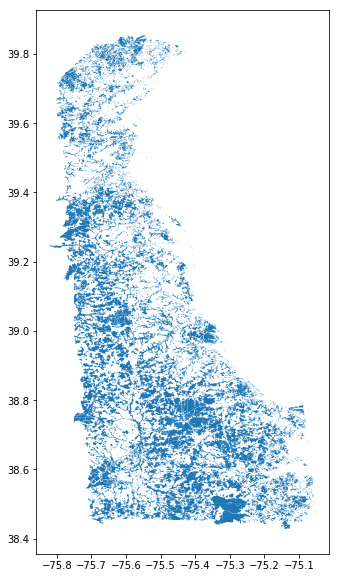

In [22]:
#Plot
gdfD.plot(figsize=(20,10));